### C S 329E HW 4

## Pair Programming Group Number: #38
## Members of Team: Jeremy Ulfohn

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [169]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link 
import graphviz # you'll probably need to install this - look at Q6 for a link 

In [170]:
df_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [171]:
df_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [172]:
# already eists as df_train
df_X = df_train.loc[:, df_train.columns != 'Type'] # loc[ all rows, all col except Type]
df_Y = df_train['Type'] # this single column is a 'series' in Pandas
# (2) do the same for df_test, for later use
test_X = df_test.loc[:, df_train.columns != 'Type']
test_Y = df_test['Type']

df_Y.head()

0    t
1    t
2    u
3    h
4    u
Name: Type, dtype: object

## Q2 Implement a function to calculate entropy 
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [173]:
# calc_entropy(s_y) definition
# from math, all we have is 'log2' to work with
def calc_entropy(s_y):
  # NOTE: normalize=True converts the counts to relative probs instead
  vc = s_y.value_counts(normalize=True, sort=False) # pandas lib
  entropy = 0. # initialize as float
  for row in vc:
    entropy -= row * log2(row) # apply formula
  return entropy




## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [174]:
# The entire data set
calc_entropy(df_Y)

1.5825333114261775

In [175]:
# Less than or equal to 200
landsize1 = df_train[df_train['Landsize'] <= 200]['Type']
calc_entropy(landsize1)


1.3456432116206725

In [176]:
# Between 200 and 450.
# use .between(inclusive="right") parameter to modify default
landsize2 = df_train[df_train['Landsize'].between(200, 450, inclusive="right")]['Type']
calc_entropy(landsize2)





1.4613003850147297

In [177]:
# greater than 450
landsize3 = df_train[df_train['Landsize'] > 450]['Type']
calc_entropy(landsize3)


1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [178]:
def calc_gini( s_y ):
  # vc ~~ "value counts"
  vc = s_y.value_counts(normalize=True, sort=False) # pandas lib
  gini = 1. # initialize as float
  for row in vc:
    gini -= row**2 # apply formula
  return gini


## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [179]:
# The entire data set
calc_gini(df_Y)

0.6655601280292637

In [180]:
# Less than or equal to 200
calc_gini(landsize1)

0.5741211482422965

In [181]:
# Between 200 and 450
# FIXME, why is this one higher?
calc_gini(landsize2)

0.6077339178346639

In [182]:
# greater than 450
calc_gini(landsize3)

0.43819341715976323

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)). 

In [183]:
# Create multi-class classifier from entropy, w max depth == 3
dec_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# df_X contains 'CouncilArea' which is categorical, so drop this one
df_X = df_X.drop(columns=['CouncilArea'])
test_X = test_X.drop(columns=['CouncilArea'])

# pd.get_dummies(data=df_Y, columns=['Type'])
# preprocess categorical data with one-hot encoding
# pd.get_dummies(data=df_X, columns=['CouncilArea'])


In [184]:
# GOAL: Display text version of the tree, using export_text

# get list of column names, for feature_names parameter
features = list(df_X.columns)
dec_tree = dec_tree.fit(df_X, df_Y)
r = tree.export_text(dec_tree, feature_names=features)
print(r)



|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- class: u
|   |   |--- Price >  915000.00
|   |   |   |--- class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- class: h



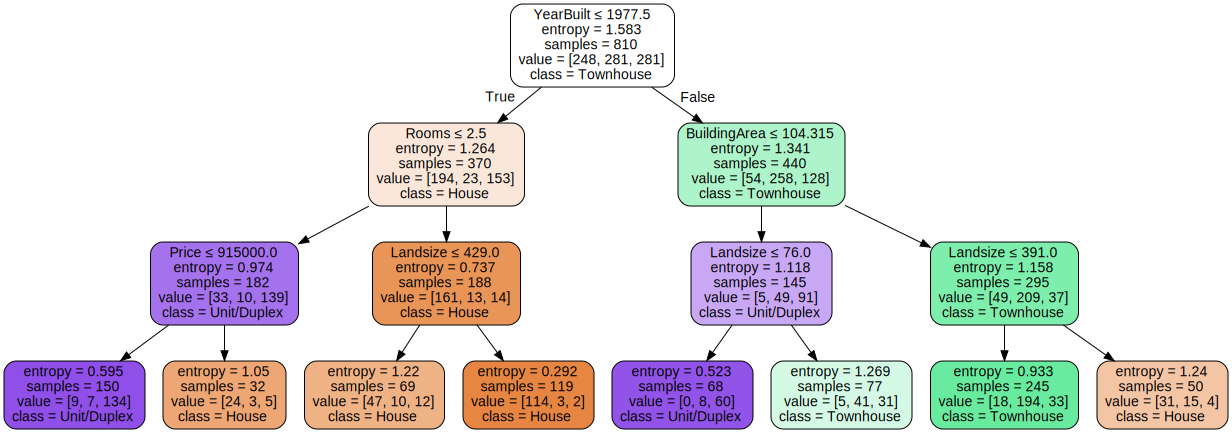

In [185]:
# Display graphviz version of the tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(df_X, df_Y)

import graphviz

# make use of .export_graphviz() parameters for better visualization
houses_data = tree.export_graphviz(clf, feature_names=features,
                                   class_names=["House", "Townhouse", "Unit/Duplex"],
                                   filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(houses_data)
graph # display graphiz version


➡️ Descriptive Analytics: ⬅️ \
In general, older residences and those with larger lot sizes/rooms are likely to be houses. \
Among newer buildings, those with larger interior square footages and land sizes are more likely to be townhouses, but \
land size is the more important of the two (obviously, since no apartment has a lot size). Of newer residences, \
only very high lot sizes are predicted to be houses. Entropy is the lowest for old, large-lotted buildings, which are \
almost all houses (n = 119). It's the highest (at the 3rd/bottom node depth) for new buildings of intermediate land size, \
which are predicted by only a small margin (41 vs 31 vs 5) to be townhouses.


## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the: 
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [186]:
# Load in the test data (already done, called df_test)
df_test.head()
# see above (Q1) for test_X and test_Y
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# import required module from sklearn
from sklearn.metrics import accuracy_score



  







In [187]:
# Build the trees using the training data
# 1) BUILD 14+14 TREES
# build NumPy array [2, 15] using numpy.arange (pretty much a shortcut for normal Python loop for this)
depths = np.arange(2, 16)

# lists to contain 14 trees each
trees_entropy = []
trees_gini = []

for d in depths: # loop through array, and for each one create a new tree
  trees_gini.append(tree.DecisionTreeClassifier(criterion='gini', max_depth=d).fit(df_X, df_Y)) # ex. of hyperparameters
  trees_entropy.append(tree.DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(df_X, df_Y)) # classifier method, then fit method for full tree

# 2) CALCULATE ERROR RATES
from sklearn.metrics import accuracy_score # import accuracy_score module from SKL

# for each tree in trees_entropy, trees_gini, calculated error rate (1 - accuracy score)
# create the 4 arrays (ent/gini vs train/test)
entropy_errors = [] # TRAIN
gini_errors = [] # TRAIN
test_entropy_errors = []
test_gini_errors = []

for clf in trees_entropy: # populate the ENTROPY errors lists
  y_predict = clf.predict(df_X)
  testY_predict = clf.predict(test_X)
  entropy_errors.append(1 - accuracy_score(df_Y, y_predict)) # append the error rate to the errors []
  test_entropy_errors.append(1 - accuracy_score(test_Y, testY_predict))

for clf in trees_gini: # populate the GINI errors lists
  y_predict = clf.predict(df_X)
  testY_predict = clf.predict(test_X)
  gini_errors.append(1 - accuracy_score(df_Y, y_predict)) # append the error rate to the errors []
  test_gini_errors.append(1 - accuracy_score(test_Y, testY_predict))

Text(0.5, 1.0, 'Train and Test Data by Hyperparameter Accuracy Graph')

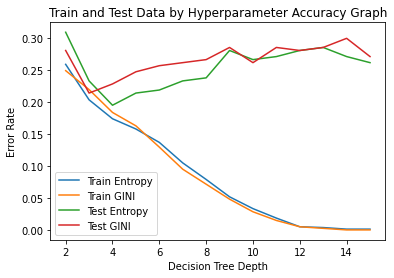

In [188]:
# 3) GRAPH/PLOT the 4 learning curves
# x axis -- depth
# y axis -- error
plt.plot(depths, entropy_errors, label="Train Entropy")
plt.plot(depths, gini_errors, label="Train GINI")
plt.plot(depths, test_entropy_errors, label="Test Entropy")
plt.plot(depths, test_gini_errors, label="Test GINI")

plt.legend() # default legend() method makes use of labels
plt.xlabel("Decision Tree Depth")
plt.ylabel("Error Rate")
plt.title("Train and Test Data by Hyperparameter Accuracy Graph")

➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️ \
For all 4 tree hyperparameter and dataframe combinations, the model is more likely to be accurate as DT depth goes from 1 to 3. After the 3-4 range, it becomes LESS accurate (on average) to increase tree depth for the training data (regardless of whether Entropy or GINI was used as the criterion up until a depth of 12, where it resumed the "beneficial" trend from the far left. For the test data, it was beneficial to increase the depth, and this was the also the case regardless of hyperparameter, illustrating that hyperparameter actually didn't make much of a difference in this case.\
\
It seems that the stark difference between train and test after the depth of 3-4 is due to the fact that the test data were the datapoints upon which the tree was created, and that since there aren't THAT many parameters, overspecifying puts nodes with very small sample sizes on the tree that increase in entropy with depth. This is the exact definition of overfitting, making this graph a great illustration of this notion.
